# Métricas de avaliação de agrupamento

Este exemplo apresenta métricas de avaliação que podem ser utilizadas para visualizar e determinar um número ótimo de clusters

In [1]:
#importando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Criando o conjunto de dados sintético usando o método make_blob

* Número de características: 5
* Número de grupos: 4
* Número de amostras: 300

In [4]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

n_features = 4
n_cluster = 4

# desvio padrão dos clusters
cluster_std = 1.2
n_samples = 300

In [3]:
make_blobs?

In [5]:
gen_dados = make_blobs(n_samples=n_samples,n_features=n_features,centers=n_cluster,cluster_std=cluster_std)

In [6]:
df=pd.DataFrame(data=gen_dados[0],columns=['Feature_'+str(i) for i in range(1,n_features+1)])
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4
0,6.807737,0.832559,-7.301309,2.876895
1,8.573358,6.940594,3.120683,-2.121950
2,4.946153,-4.138499,8.944104,0.867047
3,4.932566,-8.673358,7.917239,2.892022
4,8.680734,3.671088,4.681103,-4.398086


In [7]:
#Mostrando a quantidade de combinações possível para pares de características
from itertools import combinations
lst_vars=list(combinations(df.columns,2))
len(lst_vars)

6

### Visualizandos as características par a par

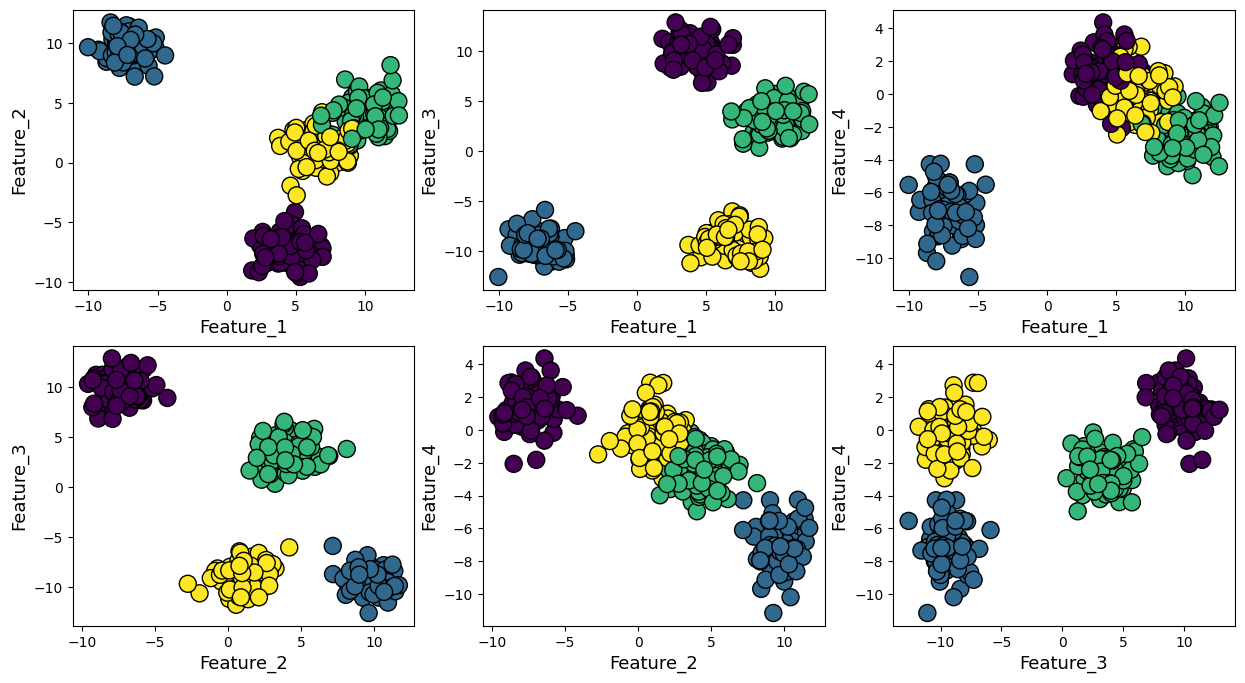

In [8]:
plt.figure(figsize=(15,8))
for i in range(1,7):
    plt.subplot(2,3,i)
    dim1=lst_vars[i-1][0]
    dim2=lst_vars[i-1][1]
    plt.scatter(df[dim1],df[dim2],c=gen_dados[1],edgecolor='k',s=150)
    plt.xlabel(f"{dim1}",fontsize=13)
    plt.ylabel(f"{dim2}",fontsize=13)

## Visualizando usando Boxplot

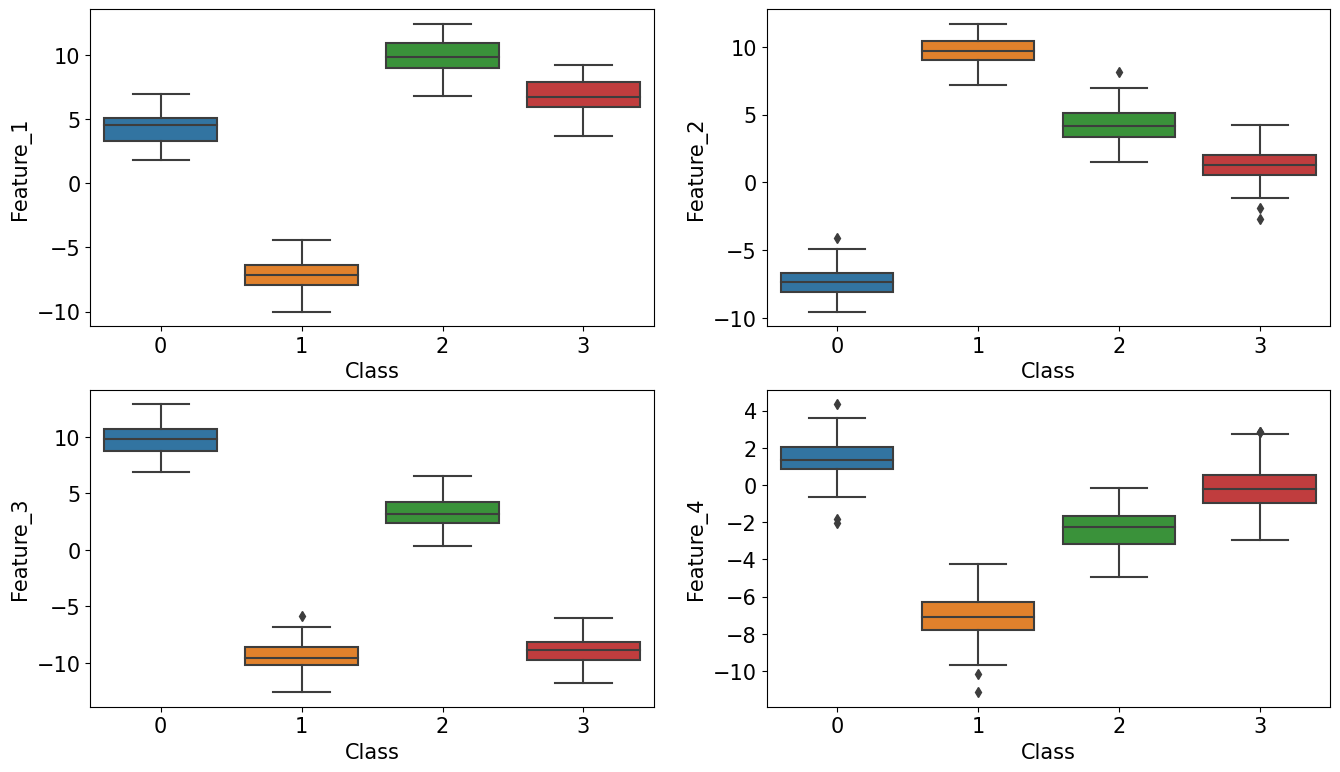

In [9]:
plt.figure(figsize=(16,14))
for i,c in enumerate(df.columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(y=df[c],x=gen_dados[1])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Class",fontsize=15)
    plt.ylabel(c,fontsize=15)
    #plt.show()

## Agrupando com o K-means

In [11]:
from sklearn.cluster import KMeans

X = df

y = gen_dados[1]

In [12]:
print(X)

     Feature_1  Feature_2  Feature_3  Feature_4
0     6.807737   0.832559  -7.301309   2.876895
1     8.573358   6.940594   3.120683  -2.121950
2     4.946153  -4.138499   8.944104   0.867047
3     4.932566  -8.673358   7.917239   2.892022
4     8.680734   3.671088   4.681103  -4.398086
..         ...        ...        ...        ...
295  -4.450420   8.955819  -8.028794  -5.526645
296   2.801819  -7.933219  12.903894   1.227640
297   6.616681   0.802306  -7.889786   1.098264
298   7.495406   2.128614 -11.047483  -0.563666
299  -7.178596   8.994621  -8.775043  -5.525736

[300 rows x 4 columns]


In [13]:
print(y)

[3 2 0 0 2 1 3 3 2 3 3 2 3 2 1 2 2 0 0 1 3 3 2 3 2 3 3 0 3 0 1 1 3 0 1 2 0
 0 2 1 2 3 0 3 0 2 0 1 1 3 1 1 2 3 2 3 1 1 0 1 0 3 2 1 0 1 3 1 1 0 3 3 1 0
 3 2 3 1 0 2 1 2 1 0 3 1 2 1 3 2 3 3 0 0 0 0 0 0 0 2 0 2 2 1 2 1 2 2 2 1 0
 0 0 3 2 3 0 1 1 3 2 0 2 2 3 1 3 1 0 1 2 1 2 2 0 3 2 2 2 2 2 1 1 1 0 3 0 2
 3 2 1 3 2 1 3 2 0 2 3 0 0 2 3 2 0 3 0 1 3 2 3 1 0 2 3 0 1 1 0 1 3 1 2 1 1
 2 2 0 2 0 1 3 1 3 2 3 3 0 3 0 0 0 3 1 1 1 1 2 0 1 2 2 2 0 1 0 1 3 1 0 1 0
 1 2 1 3 3 0 0 2 2 3 3 3 3 3 0 0 1 1 0 3 1 0 2 2 3 0 1 3 0 2 3 3 2 3 0 2 0
 0 0 0 2 1 1 0 1 1 1 0 3 3 3 0 3 1 1 3 2 2 3 1 1 3 1 2 2 2 3 2 2 2 0 0 0 1
 0 3 3 1]


## Normalizando os dados

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(X)

## Executando o K-Means

In [17]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

km_scores= []
km_silhouette = [] # intervalo [-1 ; +1] --> +1 melhor valor
db_score = [] # Mais próximo de 0 melhor

for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0, n_init='auto').fit(X_scaled)
    preds = km.predict(X_scaled)

    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette para N. cluster(s) {}: {}".format(i,silhouette))

    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin para N. cluster(s) {}: {}".format(i,db))

    print("-"*100)

Silhouette para N. cluster(s) 2: 0.582964967077982
Davies Bouldin para N. cluster(s) 2: 0.5218612945812915
----------------------------------------------------------------------------------------------------
Silhouette para N. cluster(s) 3: 0.6722992403395871
Davies Bouldin para N. cluster(s) 3: 0.5137371039497624
----------------------------------------------------------------------------------------------------
Silhouette para N. cluster(s) 4: 0.7558446966334802
Davies Bouldin para N. cluster(s) 4: 0.3568751816611002
----------------------------------------------------------------------------------------------------
Silhouette para N. cluster(s) 5: 0.6329915392815018
Davies Bouldin para N. cluster(s) 5: 0.8268061550285575
----------------------------------------------------------------------------------------------------
Silhouette para N. cluster(s) 6: 0.5056731990567008
Davies Bouldin para N. cluster(s) 6: 1.2086425781908914
---------------------------------------------------------

## Referência

https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Clustering-Dimensionality-Reduction/Clustering_metrics.ipynb

SWAMYNATHAN, Manohar. Mastering machine learning with python in six steps: A practical implementation guide to predictive data analytics using python. Apress, 2019.

BROWNLEE, Jason. Machine learning mastery with Python: understand your data, create accurate models, and work projects end-to-end. Machine Learning Mastery, 2016.

MÜLLER, Andreas C.; GUIDO, Sarah. Introduction to machine learning with Python: a guide for data scientists. " O'Reilly Media, Inc.", 2016.